    1_6_230104_002_seoul_road
    
    data : /aiffel/socar_gis/data/Z_KAIS_TL_SPRD_MANAGE_11000.shp

In [1]:
# 필요한 라이브러리 import 

import requests
import pprint
import json
import os
import math
import time
import pandas as pd
import numpy as np
import geopandas as gpd
import pyproj
import folium
import matplotlib.pyplot as plt

from shapely.geometry import mapping, shape, Point, Polygon, LineString
from folium import plugins
from folium.plugins import MarkerCluster, HeatMap

print("슝~")

슝~


In [2]:
#3 Line(서울시 도로 시각화)
### Line 실습
### 서울시 도로 공간 데이터를 Geopanda DataFrame으로 읽어오기
import os
path = os.getenv('HOME') +'/aiffel/socar_gis/data/Z_KAIS_TL_SPRD_MANAGE_11000.shp'
seoul_line_geo_df = gpd.read_file(
    path, # file_name
    encoding="cp949" # 한글깨짐 현상 방지
)

seoul_line_geo_df.head()

,ALWNC_DE,ALWNC_RESN,BSI_INT,ENG_RN,MVMN_DE,MVMN_RESN,MVM_RES_CD,NTFC_DE,OPERT_DE,RBP_CN,...,RDS_MAN_NO,REP_CN,RN,RN_CD,ROAD_BT,ROAD_LT,ROA_CLS_SE,SIG_CD,WDR_RD_CD,geometry
0,20100605,용마공원로에서 분기되는 도로구간으로 일련번호부여,8,Yongmagongwon-ro 4-gil,20181213,도로구간변경,12,20100610,20181213150729,망우동 408-1,...,1518,망우동 412-49,용마공원로4길,4118463,2.0,21.0,4,11260,3,"LINESTRING (208869.824 454864.254, 208888.820 ..."
1,20100419,중랑천의 옛 이름인 한천에서 유래,10,Hancheon-ro,20100910,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100422,20141030220124,석관동 42-12대,...,409,장위동 311-42 천,한천로,3005038,2.0,11840.0,3,11290,2,"LINESTRING (205126.997 457288.152, 205123.562 ..."
2,20100617,경희대로에서 분기된 도로구간으로 순차적으로 일련번호 부여,10,Kyungheedae-ro 1-gil,None,직권수정(속성변경),99,20100617,20190607163749,회기동 16-61,...,5,회기동 60-90,경희대로1길,4115019,6.0,109.0,4,11230,3,"LINESTRING (204570.753 454685.702, 204583.290 ..."
3,20100617,홍릉로에서 분기된 도로구간으로 순차적으로 일련번호 부여,10,Hongneung-ro 1ga-gil,None,직권수정(속성변경),99,20100617,20190507100911,제기동 632-20,...,2942,제기동 575-2,홍릉로1가길,4115654,1.0,31.0,4,11230,3,"LINESTRING (203722.326 453424.336, 203700.572 ..."
4,20100514,장위로에서 분기되는 도로구간으로 해당 일련번호 부여,10,Jangwi-ro 40-gil,20130528,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100610,20130528203251,장위동 74-5대,...,1560,장위동 66-294대,장위로40길,4121578,5.0,12.0,4,11290,3,"LINESTRING (204587.026 457063.735, 204590.052 ..."


<AxesSubplot:>

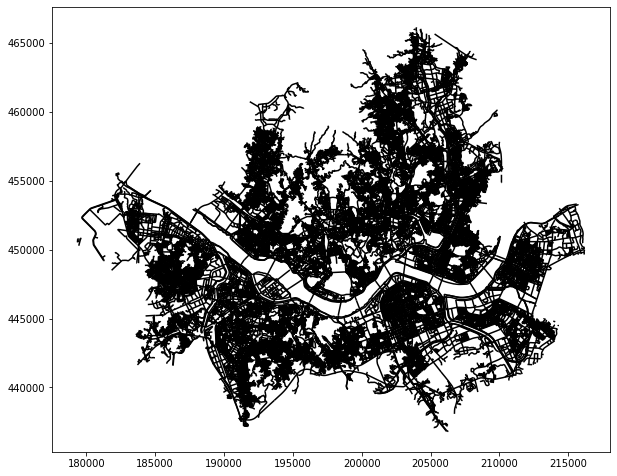

In [3]:
## 시각화 하기
# 캔버스 사이즈 정의
plt.rcParams['figure.figsize']=(10,20)

# Line 시각화
seoul_line_geo_df.plot(
    color="black"
)